# TensorBoard logging of results

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from time import time
import os
import random as python_random
import pandas as pd
import datetime
import zipfile
from shutil import copyfile
from google.colab import drive
import tarfile
import re
from PIL import Image
from google.colab import files

from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam, RMSprop, SGD
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorboard.plugins.hparams import api as hp
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
drive.mount('/content/gdrive')
copyfile('gdrive/My Drive/Colab Notebooks/logs_finali_adam.txt', 'logs_finali_adam.txt')
copyfile('gdrive/My Drive/Colab Notebooks/logs_finali_rmsprop.txt', 'logs_finali_rmsprop.txt')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


'logs_finali_rmsprop.txt'

### RMSprop

In [21]:
# Step 1: Read the data from a .txt file
file_path = 'logs_finali_rmsprop.txt'
with open(file_path, 'r') as file:
    data = file.read()

In [22]:
# Initialize an empty dictionary to store the results
results = {}

# Split the data into blocks based on the numbered entries
blocks = data.strip().split("\n\n")

# Iterate through each block and extract the relevant information
for block in blocks:
    lines = block.strip().split("\n")
    block_number = int(lines[0])
    parameters = {}
    parameters["accuracy"] = []
    parameters["val_accuracy"] = []
    for line in lines[1:]:
        if line.startswith("learning_rate"):
            learning_rate, dropout = line.split(", ")
            parameters["learning_rate"] = float(learning_rate.split(":")[1])
            parameters["dropout"] = float(dropout.split(":")[1])
        if line.startswith("epoch"):
            step_info = line.split(", ")
            accuracy = float(step_info[-3].split(":")[1].strip())
            parameters["accuracy"].append(accuracy)
            val_accuracy = float(step_info[-1].split(":")[1].strip())
            parameters["val_accuracy"].append(val_accuracy)
        if line.startswith("evaluation"):
            evaluation_info = line.split(", ")
            accuracy = float(evaluation_info[-1].split(":")[1].strip())
            parameters["final_accuracy"] = accuracy
    results[block_number] = parameters

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

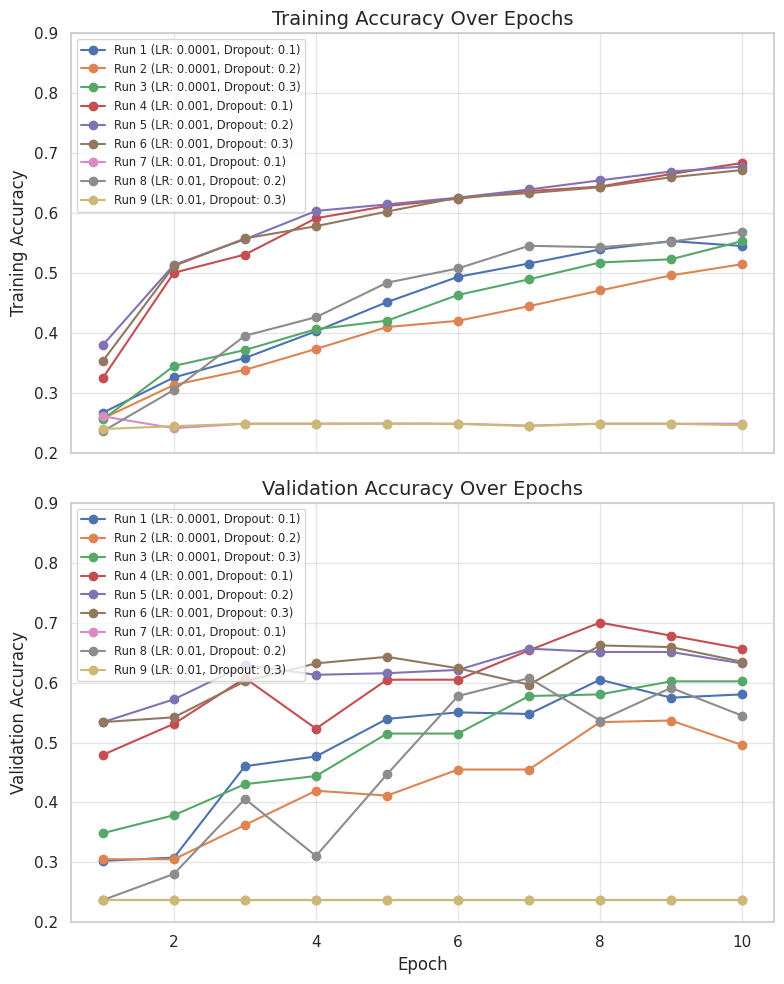

In [24]:
# Set Seaborn style
sns.set(style="whitegrid")

# Step 5: Extract accuracies and parameters
epochs = list(range(1, 11))

# Step 6: Create a figure with subplots
fig, ax = plt.subplots(2, 1, figsize=(8, 10), sharex=True)

# Training Accuracy plot
for block_number, params in results.items():
    ax[0].plot(epochs, params["accuracy"], marker='o', label=f"Run {block_number} (LR: {params['learning_rate']}, Dropout: {params['dropout']})")

# Validation Accuracy plot
for block_number, params in results.items():
    ax[1].plot(epochs, params["val_accuracy"], marker='o', label=f"Run {block_number} (LR: {params['learning_rate']}, Dropout: {params['dropout']})")

# Step 7: Customize Training Accuracy plot
ax[0].set_ylabel('Training Accuracy')
ax[0].set_title('Training Accuracy Over Epochs', fontsize=14)
ax[0].legend(fontsize='x-small', loc='best')
ax[0].grid(True, alpha=0.5)
ax[0].set_ylim(0.2, 0.9)

# Step 7: Customize Validation Accuracy plot
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Validation Accuracy')
ax[1].set_title('Validation Accuracy Over Epochs', fontsize=14)
ax[1].legend(fontsize='x-small', loc='best')
ax[1].grid(True, alpha=0.5)
ax[1].set_ylim(0.2, 0.9)

# Set common properties
for a in ax:
    a.label_outer()  # Hide x labels and tick labels for top plots and y ticks for right plots.

# Add tight layout for better spacing
plt.tight_layout()
plt.savefig("result-tuning.png")
files.download("result-tuning.png")
plt.show()

### Adam

In [3]:
# Step 1: Read the data from a .txt file
file_path1 = 'logs_finali_adam.txt'
with open(file_path1, 'r') as file:
    data1 = file.read()

In [4]:
# Initialize an empty dictionary to store the results
results1 = {}

# Split the data into blocks based on the numbered entries
blocks1 = data1.strip().split("\n\n")

# Iterate through each block and extract the relevant information
for block1 in blocks1:
    lines1 = block1.strip().split("\n")
    block_number1 = int(lines1[0])
    parameters1 = {}
    parameters1["accuracy"] = []
    parameters1["val_accuracy"] = []
    for line1 in lines1[1:]:
        if line1.startswith("learning_rate"):
            learning_rate1, dropout1 = line1.split(", ")
            parameters1["learning_rate"] = float(learning_rate1.split(":")[1])
            parameters1["dropout"] = float(dropout1.split(":")[1])
        if line1.startswith("epoch"):
            step_info1 = line1.split(", ")
            accuracy1 = float(step_info1[-3].split(":")[1].strip())
            parameters1["accuracy"].append(accuracy1)
            val_accuracy1 = float(step_info1[-1].split(":")[1].strip())
            parameters1["val_accuracy"].append(val_accuracy1)
        if line1.startswith("evaluation"):
            evaluation_info1 = line1.split(", ")
            accuracy1 = float(evaluation_info1[-1].split(":")[1].strip())
            parameters1["final_accuracy"] = accuracy1
    results1[block_number1] = parameters1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

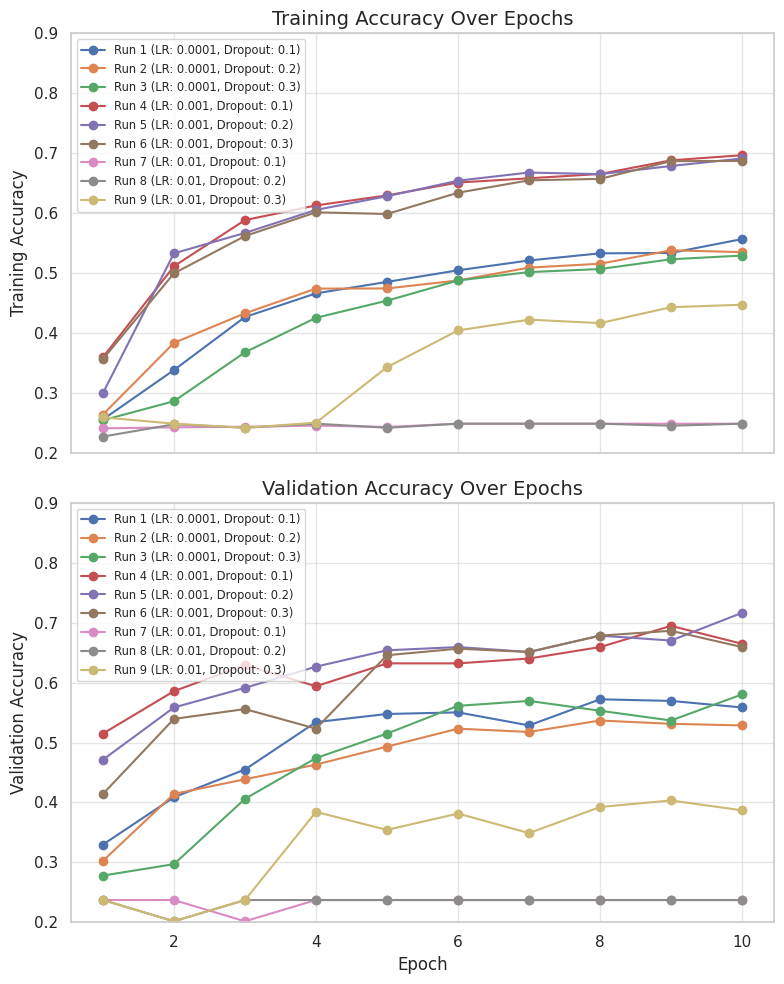

In [15]:
# Set Seaborn style
sns.set(style="whitegrid")

# Step 5: Extract accuracies and parameters
epochs = list(range(1, 11))

# Step 6: Create a figure with subplots
fig, ax = plt.subplots(2, 1, figsize=(8, 10), sharex=True)

# Training Accuracy plot
for block_number, params in results1.items():
    ax[0].plot(epochs, params["accuracy"], marker='o', label=f"Run {block_number} (LR: {params['learning_rate']}, Dropout: {params['dropout']})")

# Validation Accuracy plot
for block_number, params in results1.items():
    ax[1].plot(epochs, params["val_accuracy"], marker='o', label=f"Run {block_number} (LR: {params['learning_rate']}, Dropout: {params['dropout']})")

# Step 7: Customize Training Accuracy plot
ax[0].set_ylabel('Training Accuracy')
ax[0].set_title('Training Accuracy Over Epochs', fontsize=14)
ax[0].legend(fontsize='x-small', loc='best')
ax[0].grid(True, alpha=0.5)
ax[0].set_ylim(0.2, 0.9)

# Step 7: Customize Validation Accuracy plot
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Validation Accuracy')
ax[1].set_title('Validation Accuracy Over Epochs', fontsize=14)
ax[1].legend(fontsize='x-small', loc='best')
ax[1].grid(True, alpha=0.5)
ax[1].set_ylim(0.2, 0.9)

# Set common properties
for a in ax:
    a.label_outer()  # Hide x labels and tick labels for top plots and y ticks for right plots.

# Add tight layout for better spacing
plt.tight_layout()
plt.savefig("result-tuning_1.png")
files.download("result-tuning_1.png")
plt.show()